# 3강 데이터 탐색하기

## 정규분포 데이터 예시

In [39]:
import pandas as pd

rt = pd.read_csv('../data/rt-gaussian.csv')
print(rt)

     reaction_time
0       524.835708
1       493.086785
2       532.384427
3       576.151493
4       488.292331
..             ...
195     519.265869
196     455.807128
197     507.686255
198     502.910436
199     442.851485

[200 rows x 1 columns]


### 기술통계량

In [40]:
print(rt.describe())

       reaction_time
count     200.000000
mean      497.961452
std        46.550196
min       369.012745
25%       464.743616
50%       499.790406
75%       525.042624
max       636.008458


### 히스토그램과 이론적 곡선

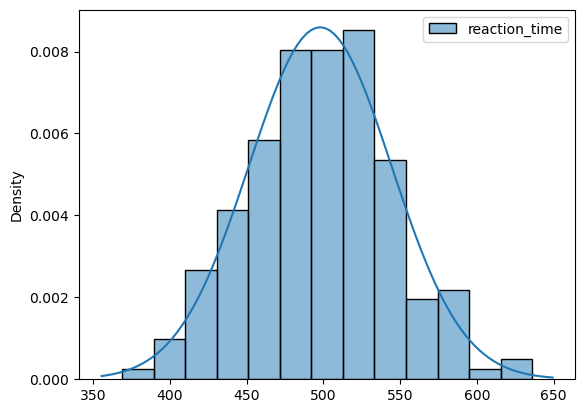

In [ ]:
from scipy import stats
import seaborn as sns
import numpy as np

mean, std = stats.norm.fit(rt)

ax = sns.histplot(rt, stat='density')
x = np.linspace(*ax.get_xlim(), 100)
ax.plot(x, stats.norm.pdf(x, mean, std))

In [42]:
pd.Series(range(-50, 50))

0    -50
1    -49
2    -48
3    -47
4    -46
      ..
95    45
96    46
97    47
98    48
99    49
Length: 100, dtype: int64

In [43]:
((mean - std < rt) & (rt < mean + std)).mean()

reaction_time    0.69
dtype: float64

In [33]:
((mean - 2*std < rt) & (rt < mean + 2*std)).mean()

reaction_time    0.94
dtype: float64

In [ ]:
((mean - 3*std < rt) & (rt < mean + 3*std)).mean()

reaction_time    1.0
dtype: float64